
# **IMPORTACIÓN DE LIBRERIAS**



In [8]:
import tarfile
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np
from time import time
from keras.utils import np_utils

# **CARGA DEL DATASET (50000K DE IMÁGENES) JUNTO CON SU RESPECTIVA NORMALIZACIÓN**


In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# **CREACIÓN DEL MODELO**

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# **ENTRENAMIENTO DEL MODELO**

In [12]:
start_time = time()
history = model.fit(x_train, y_train, batch_size= 128, epochs=10 , validation_data=(x_test, y_test), verbose=1)
elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

Epoch 1/10
391/391 [==============================] - 9s 24ms/step - loss: 2.0666 - accuracy: 0.2680 - val_loss: 1.6338 - val_accuracy: 0.4063
Epoch 2/10
391/391 [==============================] - 9s 22ms/step - loss: 1.5496 - accuracy: 0.4300 - val_loss: 1.4040 - val_accuracy: 0.4898
Epoch 3/10
391/391 [==============================] - 9s 22ms/step - loss: 1.3607 - accuracy: 0.5096 - val_loss: 1.2203 - val_accuracy: 0.5604
Epoch 4/10
391/391 [==============================] - 9s 22ms/step - loss: 1.2400 - accuracy: 0.5573 - val_loss: 1.1181 - val_accuracy: 0.6080
Epoch 5/10
391/391 [==============================] - 9s 22ms/step - loss: 1.1331 - accuracy: 0.5978 - val_loss: 1.0339 - val_accuracy: 0.6325
Epoch 6/10
391/391 [==============================] - 9s 22ms/step - loss: 1.0733 - accuracy: 0.6226 - val_loss: 0.9273 - val_accuracy: 0.6746
Epoch 7/10
391/391 [==============================] - 9s 22ms/step - loss: 1.0015 - accuracy: 0.6505 - val_loss: 0.8458 - val_accuracy: 0.7118

# **RESULTADOS DE LA EVALUACIÓN**

In [13]:
test_score = model.evaluate(x_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 4ms/step - loss: 0.7989 - accuracy: 0.7262
Test loss 0.7989, accuracy 72.62%


# **GRÁFICA DE EVALUACIÓN Y ENTRAMIENTO ACC**

[0.40630000829696655, 0.48980000615119934, 0.5604000091552734, 0.6079999804496765, 0.6324999928474426, 0.6746000051498413, 0.7117999792098999, 0.7117999792098999, 0.722599983215332, 0.7261999845504761]


Text(0, 0.5, 'acc')

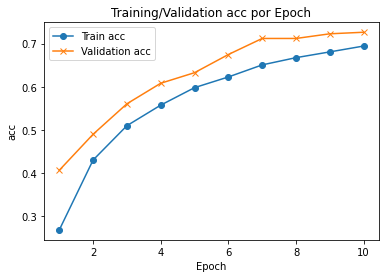

In [14]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + history.history['accuracy'], 'o-')
print(history.history['val_accuracy'])
ax.plot([None] + history.history['val_accuracy'],'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc por Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

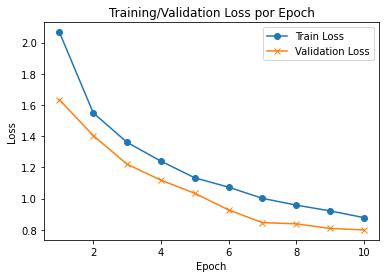

In [15]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + history.history['loss'], 'o-')
ax.plot([None] + history.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss por Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [16]:
import pandas as pd
tabla = pd.DataFrame(columns=('CNN','MIN-MAX', 'MEAN','255'))
tabla.loc[len(tabla)]=['LeNet-5',70.51,51.32, 42.50] 
tabla.loc[len(tabla)]=['MP',111.40,54.12,41.99] 
tabla.loc[len(tabla)]=['AlexNet',119.95,119.87,126.63] 
tabla
tabla.head()

,CNN,MIN-MAX,MEAN,255
0,LeNet-5,70.51,51.32,42.50
1,MP,111.40,54.12,41.99
2,AlexNet,119.95,119.87,126.63


In [17]:
import pandas as pd
tabla = pd.DataFrame(columns=('CNN','MIN-MAX', 'MEAN','255'))
tabla.loc[len(tabla)]=['LeNet-5','50.05%','56.69%','50.11%' ] 
tabla.loc[len(tabla)]=['MP','75.54%','75.86%','75.01%'] 
tabla.loc[len(tabla)]=['AlexNet','73.97%','75.29%','74.96%'] 
tabla
tabla.head()

,CNN,MIN-MAX,MEAN,255
0,LeNet-5,50.05%,56.69%,50.11%
1,MP,75.54%,75.86%,75.01%
2,AlexNet,73.97%,75.29%,74.96%


In [18]:
lenet = [0.5471000075340271, 0.550599992275238, 0.5371000170707703, 0.5496000051498413, 0.5576000213623047, 0.5666000247001648, 0.5665000081062317, 0.5665000081062317, 0.5720999836921692, 0.5666999816894531]
alex = [0.5329999923706055, 0.6796000003814697, 0.7276999950408936, 0.7267000079154968, 0.7498000264167786, 0.7384999990463257, 0.7437000274658203, 0.7404999732971191, 0.7365999817848206, 0.7511000037193298]
cnn = [0.4934000074863434, 0.5856999754905701, 0.6330000162124634, 0.6948999762535095, 0.7056000232696533, 0.7311999797821045, 0.7330999970436096, 0.7559999823570251, 0.7695000171661377, 0.7663000226020813]

Text(0, 0.5, 'acc')

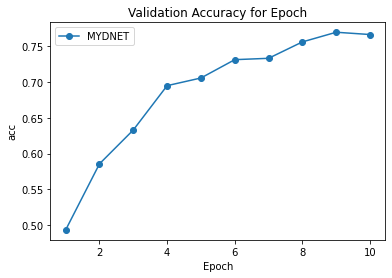

In [19]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()

ax.plot([None] + cnn,'o-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['MYDNET'], loc = 0)
ax.set_title('Validation Accuracy for Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')